In [1]:
import pandas as pd 
import numpy as np

In [2]:
df= pd.read_excel(r'data.xlsx')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
le = LabelEncoder()

In [6]:
for i in df.columns:
    if df[i].dtype == object:
        df[i]=le.fit_transform(df[i])
    else:
        pass

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int32
 2   BusinessTravel            1470 non-null   int32
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int32
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int32
 8   EmployeeCount             1470 non-null   int64
 9   EmployeeNumber            1470 non-null   int64
 10  EnvironmentSatisfaction   1470 non-null   int64
 11  Gender                    1470 non-null   int32
 12  HourlyRate                1470 non-null   int64
 13  JobInvolvement            1470 non-null   int64
 14  JobLevel                  1470 non-null 

In [8]:
df1=df.drop(['EmployeeCount','EmployeeNumber','Over18'],axis=1)

In [9]:
df1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,4,80,1,6,3,3,2,2,2,2


In [10]:
Y=df1['Attrition']
X=df1.drop(['Attrition'] , axis=1)

In [11]:
import statsmodels.api as sm

In [12]:
X_con = sm.add_constant(X)

In [13]:
X_con

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,2,0,94,...,1,80,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,3,1,61,...,4,80,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,4,1,92,...,2,80,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,4,0,56,...,3,80,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,1,1,40,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,884,1,23,2,3,3,1,41,...,3,80,1,17,3,3,5,2,0,3
1466,39,2,613,1,6,1,3,4,1,42,...,1,80,1,9,5,3,7,7,1,7
1467,27,2,155,1,4,3,1,2,1,87,...,2,80,1,6,0,3,6,2,0,3
1468,49,1,1023,2,2,3,3,4,1,63,...,4,80,0,17,3,2,9,6,0,8


In [14]:
m=sm.Logit(Y,X_con).fit()

Optimization terminated successfully.
         Current function value: 0.318505
         Iterations 7


In [15]:
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1439
Method:                           MLE   Df Model:                           30
Date:                Wed, 19 Aug 2020   Pseudo R-squ.:                  0.2789
Time:                        16:12:16   Log-Likelihood:                -468.20
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 1.144e-58
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Age                         -0.0294      0.013     -2.279      0.023      -0.055      -0.004
BusinessTravel               0.0130      0.131      0.099      0.921      -0.243       0.269
DailyRate                   -0.0003      0.000     -1.509      0.131      -0.001    9.38e-05
Department                   0.7665      0.252      3.038      0.002       0.272       1.261
DistanceFromHome             0.0369      0.010      3.617      0.000       0.017       0.057
Education                    0.0235      0.083      0.283      0.777      -0.139       0.186
EducationField               0.0578      0.064      0.904      0.366      -0.068       0.183
EnvironmentSatisfaction     -0.3932      0.078     -5.048      0.000      -0.546      -0.241
Gender                       0.3707      0.176      2.107      0.035       0.026       0.716
HourlyRate                  -0.0014      0.004     -0.324      0.746      -0.010       0.007
JobInvolvement              -0.4961      0.116     -4.263      0.000      -0.724      -0.268
JobLevel                    -0.3352      0.279     -1.202      0.230      -0.882       0.212
JobRole                     -0.0748      0.049     -1.524      0.128      -0.171       0.021
JobSatisfaction             -0.3799      0.077     -4.921      0.000      -0.531      -0.229
MaritalStatus                0.5243      0.163      3.209      0.001       0.204       0.845
MonthlyIncome            -4.731e-05    6.6e-05     -0.717      0.473      -0.000     8.2e-05
MonthlyRate               5.939e-06   1.19e-05      0.499      0.617   -1.74e-05    2.92e-05
NumCompaniesWorked           0.1722      0.036      4.788      0.000       0.102       0.243
OverTime                     1.8154      0.180     10.072      0.000       1.462       2.169
PercentSalaryHike           -0.0448      0.037     -1.205      0.228      -0.118       0.028
PerformanceRating            0.3051      0.377      0.809      0.418      -0.434       1.044
RelationshipSatisfaction    -0.2292      0.079     -2.919      0.004      -0.383      -0.075
StandardHours                0.0356      0.016      2.249      0.024       0.005       0.067
StockOptionLevel            -0.2530      0.144     -1.761      0.078      -0.535       0.029
TotalWorkingYears           -0.0508      0.027     -1.859      0.063      -0.104       0.003
TrainingTimesLastYear       -0.1525      0.069     -2.211      0.027      -0.288      -0.017
WorkLifeBalance             -0.2758      0.115     -2.396      0.017      -0.501      -0.050
YearsAtCompany               0.0946      0.037      2.581      0.010       0.023       0.166
YearsInCurrentRole          -0.1438      0.043     -3.328      0.001      -0.228      -0.059
YearsSinceLastPromotion      0.1563      0.040      3.903      0.000       0.078       0.235
YearsWithCurrManager        -0.1338      0.044     -3.054      0.002      -0.220      -0.048
===============================================================================

In [16]:
X1=X_con.drop(['BusinessTravel'], axis=1)

In [17]:
model1=sm.Logit(Y,X1).fit()
model1.summary()

Optimization terminated successfully.
         Current function value: 0.318508
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1440
Method:                           MLE   Df Model:                           29
Date:                Wed, 19 Aug 2020   Pseudo R-squ.:                  0.2789
Time:                        16:12:17   Log-Likelihood:                -468.21
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 3.216e-59
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Age                         -0.0295      0.013     -2.284      0.022      -0.055      -0.004
DailyRate                   -0.0003      0.000     -1.511      0.131      -0.001    9.34e-05
Department                   0.7664      0.252      3.037      0.002       0.272       1.261
DistanceFromHome             0.0368      0.010      3.618      0.000       0.017       0.057
Education                    0.0235      0.083      0.283      0.777      -0.139       0.186
EducationField               0.0578      0.064      0.904      0.366      -0.068       0.183
EnvironmentSatisfaction     -0.3930      0.078     -5.048      0.000      -0.546      -0.240
Gender                       0.3703      0.176      2.105      0.035       0.025       0.715
HourlyRate                  -0.0013      0.004     -0.323      0.746      -0.010       0.007
JobInvolvement              -0.4958      0.116     -4.262      0.000      -0.724      -0.268
JobLevel                    -0.3365      0.279     -1.208      0.227      -0.883       0.210
JobRole                     -0.0748      0.049     -1.523      0.128      -0.171       0.021
JobSatisfaction             -0.3802      0.077     -4.930      0.000      -0.531      -0.229
MaritalStatus                0.5242      0.163      3.209      0.001       0.204       0.844
MonthlyIncome             -4.71e-05    6.6e-05     -0.714      0.475      -0.000    8.22e-05
MonthlyRate               5.966e-06   1.19e-05      0.502      0.616   -1.73e-05    2.93e-05
NumCompaniesWorked           0.1722      0.036      4.788      0.000       0.102       0.243
OverTime                     1.8156      0.180     10.074      0.000       1.462       2.169
PercentSalaryHike           -0.0449      0.037     -1.211      0.226      -0.118       0.028
PerformanceRating            0.3063      0.377      0.813      0.416      -0.432       1.045
RelationshipSatisfaction    -0.2295      0.078     -2.924      0.003      -0.383      -0.076
StandardHours                0.0359      0.016      2.308      0.021       0.005       0.066
StockOptionLevel            -0.2526      0.144     -1.759      0.079      -0.534       0.029
TotalWorkingYears           -0.0506      0.027     -1.856      0.063      -0.104       0.003
TrainingTimesLastYear       -0.1523      0.069     -2.210      0.027      -0.287      -0.017
WorkLifeBalance             -0.2762      0.115     -2.401      0.016      -0.502      -0.051
YearsAtCompany               0.0943      0.037      2.579      0.010       0.023       0.166
YearsInCurrentRole          -0.1435      0.043     -3.329      0.001      -0.228      -0.059
YearsSinceLastPromotion      0.1562      0.040      3.902      0.000       0.078       0.235
YearsWithCurrManager        -0.1339      0.044     -3.060      0.002      -0.220      -0.048
============================================================================================
"""

In [18]:
X2=X1.drop(['Education'], axis=1)

In [19]:
model2=sm.Logit(Y,X2).fit()
model2.summary()

Optimization terminated successfully.
         Current function value: 0.318535
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1441
Method:                           MLE   Df Model:                           28
Date:                Wed, 19 Aug 2020   Pseudo R-squ.:                  0.2788
Time:                        16:12:18   Log-Likelihood:                -468.25
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 9.171e-60
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Age                         -0.0289      0.013     -2.270      0.023      -0.054      -0.004
DailyRate                   -0.0003      0.000     -1.515      0.130      -0.001    9.25e-05
Department                   0.7644      0.252      3.031      0.002       0.270       1.259
DistanceFromHome             0.0369      0.010      3.633      0.000       0.017       0.057
EducationField               0.0567      0.064      0.888      0.374      -0.068       0.182
EnvironmentSatisfaction     -0.3933      0.078     -5.052      0.000      -0.546      -0.241
Gender                       0.3688      0.176      2.098      0.036       0.024       0.713
HourlyRate                  -0.0014      0.004     -0.328      0.743      -0.010       0.007
JobInvolvement              -0.4947      0.116     -4.255      0.000      -0.723      -0.267
JobLevel                    -0.3379      0.278     -1.214      0.225      -0.884       0.208
JobRole                     -0.0744      0.049     -1.515      0.130      -0.171       0.022
JobSatisfaction             -0.3803      0.077     -4.932      0.000      -0.531      -0.229
MaritalStatus                0.5260      0.163      3.221      0.001       0.206       0.846
MonthlyIncome            -4.674e-05   6.59e-05     -0.709      0.478      -0.000    8.24e-05
MonthlyRate                 5.8e-06   1.19e-05      0.488      0.625   -1.75e-05    2.91e-05
NumCompaniesWorked           0.1728      0.036      4.812      0.000       0.102       0.243
OverTime                     1.8154      0.180     10.073      0.000       1.462       2.169
PercentSalaryHike           -0.0447      0.037     -1.206      0.228      -0.117       0.028
PerformanceRating            0.3037      0.377      0.806      0.420      -0.435       1.042
RelationshipSatisfaction    -0.2297      0.078     -2.927      0.003      -0.383      -0.076
StandardHours                0.0365      0.015      2.378      0.017       0.006       0.067
StockOptionLevel            -0.2509      0.144     -1.748      0.080      -0.532       0.030
TotalWorkingYears           -0.0505      0.027     -1.854      0.064      -0.104       0.003
TrainingTimesLastYear       -0.1520      0.069     -2.204      0.028      -0.287      -0.017
WorkLifeBalance             -0.2768      0.115     -2.408      0.016      -0.502      -0.051
YearsAtCompany               0.0940      0.037      2.572      0.010       0.022       0.166
YearsInCurrentRole          -0.1431      0.043     -3.322      0.001      -0.228      -0.059
YearsSinceLastPromotion      0.1566      0.040      3.914      0.000       0.078       0.235
YearsWithCurrManager        -0.1335      0.044     -3.053      0.002      -0.219      -0.048
============================================================================================
"""

In [20]:
X3=X2.drop(['HourlyRate'], axis=1)
model3= sm.Logit(Y,X3).fit()
model3.summary()

Optimization terminated successfully.
         Current function value: 0.318572
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1442
Method:                           MLE   Df Model:                           27
Date:                Wed, 19 Aug 2020   Pseudo R-squ.:                  0.2788
Time:                        16:12:18   Log-Likelihood:                -468.30
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 2.601e-60
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Age                         -0.0292      0.013     -2.290      0.022      -0.054      -0.004
DailyRate                   -0.0003      0.000     -1.524      0.127      -0.001    9.05e-05
Department                   0.7635      0.252      3.025      0.002       0.269       1.258
DistanceFromHome             0.0369      0.010      3.628      0.000       0.017       0.057
EducationField               0.0574      0.064      0.899      0.369      -0.068       0.183
EnvironmentSatisfaction     -0.3931      0.078     -5.048      0.000      -0.546      -0.240
Gender                       0.3710      0.176      2.111      0.035       0.027       0.715
JobInvolvement              -0.4968      0.116     -4.281      0.000      -0.724      -0.269
JobLevel                    -0.3360      0.278     -1.207      0.228      -0.882       0.210
JobRole                     -0.0741      0.049     -1.509      0.131      -0.170       0.022
JobSatisfaction             -0.3785      0.077     -4.922      0.000      -0.529      -0.228
MaritalStatus                0.5250      0.163      3.215      0.001       0.205       0.845
MonthlyIncome            -4.748e-05   6.59e-05     -0.721      0.471      -0.000    8.16e-05
MonthlyRate               5.789e-06   1.19e-05      0.487      0.626   -1.75e-05    2.91e-05
NumCompaniesWorked           0.1730      0.036      4.819      0.000       0.103       0.243
OverTime                     1.8147      0.180     10.070      0.000       1.461       2.168
PercentSalaryHike           -0.0446      0.037     -1.204      0.229      -0.117       0.028
PerformanceRating            0.3042      0.377      0.808      0.419      -0.434       1.042
RelationshipSatisfaction    -0.2290      0.078     -2.920      0.003      -0.383      -0.075
StandardHours                0.0354      0.015      2.362      0.018       0.006       0.065
StockOptionLevel            -0.2517      0.143     -1.755      0.079      -0.533       0.029
TotalWorkingYears           -0.0504      0.027     -1.851      0.064      -0.104       0.003
TrainingTimesLastYear       -0.1520      0.069     -2.205      0.027      -0.287      -0.017
WorkLifeBalance             -0.2770      0.115     -2.407      0.016      -0.502      -0.051
YearsAtCompany               0.0938      0.037      2.567      0.010       0.022       0.165
YearsInCurrentRole          -0.1432      0.043     -3.324      0.001      -0.228      -0.059
YearsSinceLastPromotion      0.1573      0.040      3.934      0.000       0.079       0.236
YearsWithCurrManager        -0.1335      0.044     -3.053      0.002      -0.219      -0.048
============================================================================================
"""

In [21]:
X4=X3.drop(['MonthlyRate'], axis=1)
model4= sm.Logit(Y,X4).fit()
model4.summary()

Optimization terminated successfully.
         Current function value: 0.318653
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1443
Method:                           MLE   Df Model:                           26
Date:                Wed, 19 Aug 2020   Pseudo R-squ.:                  0.2786
Time:                        16:12:19   Log-Likelihood:                -468.42
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 7.692e-61
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Age                         -0.0293      0.013     -2.304      0.021      -0.054      -0.004
DailyRate                   -0.0003      0.000     -1.540      0.124      -0.001    8.72e-05
Department                   0.7628      0.252      3.023      0.003       0.268       1.257
DistanceFromHome             0.0371      0.010      3.662      0.000       0.017       0.057
EducationField               0.0564      0.064      0.883      0.377      -0.069       0.181
EnvironmentSatisfaction     -0.3915      0.078     -5.030      0.000      -0.544      -0.239
Gender                       0.3649      0.175      2.083      0.037       0.022       0.708
JobInvolvement              -0.4970      0.116     -4.283      0.000      -0.724      -0.270
JobLevel                    -0.3291      0.278     -1.184      0.236      -0.874       0.215
JobRole                     -0.0739      0.049     -1.506      0.132      -0.170       0.022
JobSatisfaction             -0.3778      0.077     -4.914      0.000      -0.529      -0.227
MaritalStatus                0.5233      0.163      3.206      0.001       0.203       0.843
MonthlyIncome            -4.831e-05   6.58e-05     -0.734      0.463      -0.000    8.07e-05
NumCompaniesWorked           0.1728      0.036      4.815      0.000       0.102       0.243
OverTime                     1.8156      0.180     10.076      0.000       1.462       2.169
PercentSalaryHike           -0.0438      0.037     -1.185      0.236      -0.116       0.029
PerformanceRating            0.2921      0.376      0.777      0.437      -0.445       1.029
RelationshipSatisfaction    -0.2286      0.078     -2.915      0.004      -0.382      -0.075
StandardHours                0.0369      0.015      2.505      0.012       0.008       0.066
StockOptionLevel            -0.2562      0.143     -1.788      0.074      -0.537       0.025
TotalWorkingYears           -0.0503      0.027     -1.848      0.065      -0.104       0.003
TrainingTimesLastYear       -0.1523      0.069     -2.209      0.027      -0.287      -0.017
WorkLifeBalance             -0.2766      0.115     -2.406      0.016      -0.502      -0.051
YearsAtCompany               0.0934      0.036      2.561      0.010       0.022       0.165
YearsInCurrentRole          -0.1429      0.043     -3.319      0.001      -0.227      -0.059
YearsSinceLastPromotion      0.1583      0.040      3.964      0.000       0.080       0.237
YearsWithCurrManager        -0.1345      0.044     -3.082      0.002      -0.220      -0.049
============================================================================================
"""

In [22]:
X5=X4.drop(['MonthlyIncome'], axis=1)
model5= sm.Logit(Y,X5).fit()
model5.summary()

Optimization terminated successfully.
         Current function value: 0.318837
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1444
Method:                           MLE   Df Model:                           25
Date:                Wed, 19 Aug 2020   Pseudo R-squ.:                  0.2782
Time:                        16:12:19   Log-Likelihood:                -468.69
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 2.572e-61
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Age                         -0.0292      0.013     -2.289      0.022      -0.054      -0.004
DailyRate                   -0.0003      0.000     -1.549      0.121      -0.001    8.54e-05
Department                   0.7777      0.250      3.105      0.002       0.287       1.269
DistanceFromHome             0.0376      0.010      3.719      0.000       0.018       0.057
EducationField               0.0559      0.064      0.876      0.381      -0.069       0.181
EnvironmentSatisfaction     -0.3895      0.078     -5.011      0.000      -0.542      -0.237
Gender                       0.3638      0.175      2.077      0.038       0.020       0.707
JobInvolvement              -0.4968      0.116     -4.289      0.000      -0.724      -0.270
JobLevel                    -0.4975      0.158     -3.152      0.002      -0.807      -0.188
JobRole                     -0.0754      0.049     -1.541      0.123      -0.171       0.021
JobSatisfaction             -0.3763      0.077     -4.899      0.000      -0.527      -0.226
MaritalStatus                0.5254      0.163      3.216      0.001       0.205       0.846
NumCompaniesWorked           0.1719      0.036      4.803      0.000       0.102       0.242
OverTime                     1.8128      0.180     10.067      0.000       1.460       2.166
PercentSalaryHike           -0.0448      0.037     -1.213      0.225      -0.117       0.028
PerformanceRating            0.3027      0.375      0.806      0.420      -0.433       1.039
RelationshipSatisfaction    -0.2289      0.078     -2.918      0.004      -0.383      -0.075
StandardHours                0.0371      0.015      2.520      0.012       0.008       0.066
StockOptionLevel            -0.2560      0.143     -1.785      0.074      -0.537       0.025
TotalWorkingYears           -0.0521      0.027     -1.918      0.055      -0.105       0.001
TrainingTimesLastYear       -0.1522      0.069     -2.208      0.027      -0.287      -0.017
WorkLifeBalance             -0.2775      0.115     -2.415      0.016      -0.503      -0.052
YearsAtCompany               0.0921      0.036      2.539      0.011       0.021       0.163
YearsInCurrentRole          -0.1425      0.043     -3.311      0.001      -0.227      -0.058
YearsSinceLastPromotion      0.1563      0.040      3.931      0.000       0.078       0.234
YearsWithCurrManager        -0.1316      0.043     -3.029      0.002      -0.217      -0.046
============================================================================================
"""

In [23]:
X6=X5.drop(['PerformanceRating'], axis=1)
model6= sm.Logit(Y,X6).fit()
model6.summary()

Optimization terminated successfully.
         Current function value: 0.319058
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1445
Method:                           MLE   Df Model:                           24
Date:                Wed, 19 Aug 2020   Pseudo R-squ.:                  0.2777
Time:                        16:12:20   Log-Likelihood:                -469.02
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 8.879e-62
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Age                         -0.0294      0.013     -2.309      0.021      -0.054      -0.004
DailyRate                   -0.0003      0.000     -1.548      0.122      -0.001    8.56e-05
Department                   0.7753      0.250      3.096      0.002       0.284       1.266
DistanceFromHome             0.0373      0.010      3.686      0.000       0.017       0.057
EducationField               0.0556      0.064      0.871      0.384      -0.070       0.181
EnvironmentSatisfaction     -0.3901      0.078     -5.019      0.000      -0.542      -0.238
Gender                       0.3605      0.175      2.059      0.039       0.017       0.704
JobInvolvement              -0.4961      0.116     -4.285      0.000      -0.723      -0.269
JobLevel                    -0.5018      0.158     -3.177      0.001      -0.811      -0.192
JobRole                     -0.0757      0.049     -1.548      0.122      -0.172       0.020
JobSatisfaction             -0.3760      0.077     -4.897      0.000      -0.526      -0.225
MaritalStatus                0.5216      0.163      3.192      0.001       0.201       0.842
NumCompaniesWorked           0.1709      0.036      4.781      0.000       0.101       0.241
OverTime                     1.8168      0.180     10.097      0.000       1.464       2.169
PercentSalaryHike           -0.0220      0.024     -0.934      0.350      -0.068       0.024
RelationshipSatisfaction    -0.2290      0.078     -2.924      0.003      -0.383      -0.076
StandardHours                0.0449      0.011      4.051      0.000       0.023       0.067
StockOptionLevel            -0.2604      0.144     -1.812      0.070      -0.542       0.021
TotalWorkingYears           -0.0514      0.027     -1.892      0.058      -0.105       0.002
TrainingTimesLastYear       -0.1526      0.069     -2.214      0.027      -0.288      -0.017
WorkLifeBalance             -0.2768      0.115     -2.410      0.016      -0.502      -0.052
YearsAtCompany               0.0918      0.036      2.528      0.011       0.021       0.163
YearsInCurrentRole          -0.1414      0.043     -3.283      0.001      -0.226      -0.057
YearsSinceLastPromotion      0.1570      0.040      3.951      0.000       0.079       0.235
YearsWithCurrManager        -0.1313      0.043     -3.021      0.003      -0.216      -0.046
============================================================================================
"""

In [24]:
X7=X6.drop(['EducationField'], axis=1)
model7= sm.Logit(Y,X7).fit()
model7.summary()

Optimization terminated successfully.
         Current function value: 0.319315
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1446
Method:                           MLE   Df Model:                           23
Date:                Wed, 19 Aug 2020   Pseudo R-squ.:                  0.2771
Time:                        16:12:20   Log-Likelihood:                -469.39
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 3.157e-62
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Age                         -0.0301      0.013     -2.362      0.018      -0.055      -0.005
DailyRate                   -0.0003      0.000     -1.510      0.131      -0.001    9.33e-05
Department                   0.7776      0.250      3.109      0.002       0.287       1.268
DistanceFromHome             0.0372      0.010      3.673      0.000       0.017       0.057
EnvironmentSatisfaction     -0.3845      0.077     -4.971      0.000      -0.536      -0.233
Gender                       0.3618      0.175      2.067      0.039       0.019       0.705
JobInvolvement              -0.4979      0.116     -4.306      0.000      -0.724      -0.271
JobLevel                    -0.5066      0.158     -3.209      0.001      -0.816      -0.197
JobRole                     -0.0762      0.049     -1.557      0.119      -0.172       0.020
JobSatisfaction             -0.3792      0.077     -4.948      0.000      -0.529      -0.229
MaritalStatus                0.5195      0.163      3.182      0.001       0.200       0.839
NumCompaniesWorked           0.1712      0.036      4.797      0.000       0.101       0.241
OverTime                     1.8154      0.180     10.094      0.000       1.463       2.168
PercentSalaryHike           -0.0218      0.023     -0.926      0.354      -0.068       0.024
RelationshipSatisfaction    -0.2297      0.078     -2.933      0.003      -0.383      -0.076
StandardHours                0.0465      0.011      4.247      0.000       0.025       0.068
StockOptionLevel            -0.2621      0.144     -1.825      0.068      -0.543       0.019
TotalWorkingYears           -0.0509      0.027     -1.875      0.061      -0.104       0.002
TrainingTimesLastYear       -0.1491      0.069     -2.168      0.030      -0.284      -0.014
WorkLifeBalance             -0.2737      0.115     -2.385      0.017      -0.499      -0.049
YearsAtCompany               0.0914      0.036      2.513      0.012       0.020       0.163
YearsInCurrentRole          -0.1412      0.043     -3.282      0.001      -0.225      -0.057
YearsSinceLastPromotion      0.1573      0.040      3.959      0.000       0.079       0.235
YearsWithCurrManager        -0.1295      0.043     -2.986      0.003      -0.215      -0.044
============================================================================================
"""

In [25]:
X8=X7.drop(['PercentSalaryHike'], axis=1)
model8= sm.Logit(Y,X8).fit()
model8.summary()

Optimization terminated successfully.
         Current function value: 0.319609
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1447
Method:                           MLE   Df Model:                           22
Date:                Wed, 19 Aug 2020   Pseudo R-squ.:                  0.2764
Time:                        16:12:21   Log-Likelihood:                -469.83
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 1.158e-62
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Age                         -0.0305      0.013     -2.396      0.017      -0.055      -0.006
DailyRate                   -0.0003      0.000     -1.550      0.121      -0.001    8.49e-05
Department                   0.7736      0.250      3.097      0.002       0.284       1.263
DistanceFromHome             0.0370      0.010      3.650      0.000       0.017       0.057
EnvironmentSatisfaction     -0.3833      0.077     -4.959      0.000      -0.535      -0.232
Gender                       0.3626      0.175      2.073      0.038       0.020       0.706
JobInvolvement              -0.4962      0.115     -4.297      0.000      -0.723      -0.270
JobLevel                    -0.5000      0.158     -3.170      0.002      -0.809      -0.191
JobRole                     -0.0763      0.049     -1.560      0.119      -0.172       0.020
JobSatisfaction             -0.3785      0.077     -4.944      0.000      -0.529      -0.228
MaritalStatus                0.5198      0.163      3.185      0.001       0.200       0.840
NumCompaniesWorked           0.1720      0.036      4.820      0.000       0.102       0.242
OverTime                     1.8153      0.180     10.094      0.000       1.463       2.168
RelationshipSatisfaction    -0.2267      0.078     -2.901      0.004      -0.380      -0.074
StandardHours                0.0423      0.010      4.255      0.000       0.023       0.062
StockOptionLevel            -0.2626      0.144     -1.829      0.067      -0.544       0.019
TotalWorkingYears           -0.0517      0.027     -1.904      0.057      -0.105       0.002
TrainingTimesLastYear       -0.1485      0.069     -2.159      0.031      -0.283      -0.014
WorkLifeBalance             -0.2721      0.115     -2.369      0.018      -0.497      -0.047
YearsAtCompany               0.0924      0.036      2.537      0.011       0.021       0.164
YearsInCurrentRole          -0.1414      0.043     -3.287      0.001      -0.226      -0.057
YearsSinceLastPromotion      0.1576      0.040      3.969      0.000       0.080       0.235
YearsWithCurrManager        -0.1297      0.043     -2.988      0.003      -0.215      -0.045
============================================================================================
"""

In [26]:
X9=X8.drop(['DailyRate'], axis=1)
model9= sm.Logit(Y,X9).fit()
model9.summary()

Optimization terminated successfully.
         Current function value: 0.320430
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1448
Method:                           MLE   Df Model:                           21
Date:                Wed, 19 Aug 2020   Pseudo R-squ.:                  0.2745
Time:                        16:12:21   Log-Likelihood:                -471.03
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 8.658e-63
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Age                         -0.0306      0.013     -2.412      0.016      -0.055      -0.006
Department                   0.7501      0.249      3.015      0.003       0.262       1.238
DistanceFromHome             0.0372      0.010      3.684      0.000       0.017       0.057
EnvironmentSatisfaction     -0.3830      0.077     -4.962      0.000      -0.534      -0.232
Gender                       0.3572      0.175      2.045      0.041       0.015       0.700
JobInvolvement              -0.5020      0.115     -4.352      0.000      -0.728      -0.276
JobLevel                    -0.4951      0.158     -3.142      0.002      -0.804      -0.186
JobRole                     -0.0726      0.049     -1.490      0.136      -0.168       0.023
JobSatisfaction             -0.3847      0.076     -5.032      0.000      -0.535      -0.235
MaritalStatus                0.5309      0.163      3.266      0.001       0.212       0.850
NumCompaniesWorked           0.1694      0.036      4.767      0.000       0.100       0.239
OverTime                     1.8057      0.179     10.069      0.000       1.454       2.157
RelationshipSatisfaction    -0.2260      0.078     -2.898      0.004      -0.379      -0.073
StandardHours                0.0395      0.010      4.056      0.000       0.020       0.059
StockOptionLevel            -0.2608      0.143     -1.829      0.067      -0.540       0.019
TotalWorkingYears           -0.0528      0.027     -1.941      0.052      -0.106       0.001
TrainingTimesLastYear       -0.1508      0.069     -2.194      0.028      -0.286      -0.016
WorkLifeBalance             -0.2646      0.115     -2.308      0.021      -0.489      -0.040
YearsAtCompany               0.0939      0.036      2.580      0.010       0.023       0.165
YearsInCurrentRole          -0.1440      0.043     -3.364      0.001      -0.228      -0.060
YearsSinceLastPromotion      0.1609      0.040      4.064      0.000       0.083       0.238
YearsWithCurrManager        -0.1305      0.043     -2.999      0.003      -0.216      -0.045
============================================================================================
"""

In [27]:
X10=X9.drop(['JobRole'], axis=1)
model10= sm.Logit(Y,X10).fit()
model10.summary()

Optimization terminated successfully.
         Current function value: 0.321184
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1449
Method:                           MLE   Df Model:                           20
Date:                Wed, 19 Aug 2020   Pseudo R-squ.:                  0.2728
Time:                        16:12:22   Log-Likelihood:                -472.14
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 5.779e-63
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Age                         -0.0310      0.013     -2.439      0.015      -0.056      -0.006
Department                   0.4847      0.169      2.869      0.004       0.154       0.816
DistanceFromHome             0.0373      0.010      3.702      0.000       0.018       0.057
EnvironmentSatisfaction     -0.3821      0.077     -4.952      0.000      -0.533      -0.231
Gender                       0.3680      0.174      2.110      0.035       0.026       0.710
JobInvolvement              -0.5109      0.115     -4.425      0.000      -0.737      -0.285
JobLevel                    -0.4425      0.152     -2.910      0.004      -0.741      -0.144
JobSatisfaction             -0.3854      0.076     -5.042      0.000      -0.535      -0.236
MaritalStatus                0.5287      0.163      3.253      0.001       0.210       0.847
NumCompaniesWorked           0.1685      0.036      4.738      0.000       0.099       0.238
OverTime                     1.7833      0.178     10.001      0.000       1.434       2.133
RelationshipSatisfaction    -0.2272      0.078     -2.919      0.004      -0.380      -0.075
StandardHours                0.0389      0.010      4.001      0.000       0.020       0.058
StockOptionLevel            -0.2560      0.143     -1.796      0.072      -0.535       0.023
TotalWorkingYears           -0.0516      0.027     -1.903      0.057      -0.105       0.002
TrainingTimesLastYear       -0.1444      0.069     -2.103      0.035      -0.279      -0.010
WorkLifeBalance             -0.2687      0.115     -2.346      0.019      -0.493      -0.044
YearsAtCompany               0.0911      0.036      2.507      0.012       0.020       0.162
YearsInCurrentRole          -0.1416      0.043     -3.302      0.001      -0.226      -0.058
YearsSinceLastPromotion      0.1602      0.040      4.036      0.000       0.082       0.238
YearsWithCurrManager        -0.1307      0.044     -2.991      0.003      -0.216      -0.045
============================================================================================
"""

In [28]:
X11=X10.drop(['StockOptionLevel'], axis=1)
model11= sm.Logit(Y,X11).fit()
model11.summary()

Optimization terminated successfully.
         Current function value: 0.322313
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1450
Method:                           MLE   Df Model:                           19
Date:                Wed, 19 Aug 2020   Pseudo R-squ.:                  0.2703
Time:                        16:12:22   Log-Likelihood:                -473.80
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 6.399e-63
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Age                         -0.0316      0.013     -2.482      0.013      -0.057      -0.007
Department                   0.4760      0.169      2.817      0.005       0.145       0.807
DistanceFromHome             0.0360      0.010      3.607      0.000       0.016       0.056
EnvironmentSatisfaction     -0.3803      0.077     -4.939      0.000      -0.531      -0.229
Gender                       0.3524      0.174      2.028      0.043       0.012       0.693
JobInvolvement              -0.5099      0.115     -4.437      0.000      -0.735      -0.285
JobLevel                    -0.4415      0.151     -2.919      0.004      -0.738      -0.145
JobSatisfaction             -0.3923      0.076     -5.149      0.000      -0.542      -0.243
MaritalStatus                0.7306      0.122      5.994      0.000       0.492       0.969
NumCompaniesWorked           0.1661      0.036      4.675      0.000       0.096       0.236
OverTime                     1.7729      0.178      9.981      0.000       1.425       2.121
RelationshipSatisfaction    -0.2161      0.077     -2.794      0.005      -0.368      -0.064
StandardHours                0.0345      0.009      3.667      0.000       0.016       0.053
TotalWorkingYears           -0.0495      0.027     -1.831      0.067      -0.103       0.003
TrainingTimesLastYear       -0.1472      0.069     -2.145      0.032      -0.282      -0.013
WorkLifeBalance             -0.2778      0.114     -2.428      0.015      -0.502      -0.054
YearsAtCompany               0.0917      0.036      2.532      0.011       0.021       0.163
YearsInCurrentRole          -0.1426      0.043     -3.340      0.001      -0.226      -0.059
YearsSinceLastPromotion      0.1614      0.040      4.080      0.000       0.084       0.239
YearsWithCurrManager        -0.1330      0.044     -3.045      0.002      -0.219      -0.047
============================================================================================
"""

In [29]:
X12=X11.drop(['TotalWorkingYears'], axis=1)
model12= sm.Logit(Y,X12).fit()
model12.summary()

Optimization terminated successfully.
         Current function value: 0.323493
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1451
Method:                           MLE   Df Model:                           18
Date:                Wed, 19 Aug 2020   Pseudo R-squ.:                  0.2676
Time:                        16:12:23   Log-Likelihood:                -475.53
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 7.458e-63
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Age                         -0.0425      0.012     -3.695      0.000      -0.065      -0.020
Department                   0.5247      0.168      3.130      0.002       0.196       0.853
DistanceFromHome             0.0359      0.010      3.612      0.000       0.016       0.055
EnvironmentSatisfaction     -0.3721      0.077     -4.853      0.000      -0.522      -0.222
Gender                       0.3493      0.173      2.016      0.044       0.010       0.689
JobInvolvement              -0.5021      0.114     -4.393      0.000      -0.726      -0.278
JobLevel                    -0.5848      0.129     -4.521      0.000      -0.838      -0.331
JobSatisfaction             -0.3859      0.076     -5.081      0.000      -0.535      -0.237
MaritalStatus                0.7266      0.122      5.976      0.000       0.488       0.965
NumCompaniesWorked           0.1502      0.035      4.355      0.000       0.083       0.218
OverTime                     1.7501      0.177      9.915      0.000       1.404       2.096
RelationshipSatisfaction    -0.2056      0.077     -2.669      0.008      -0.357      -0.055
StandardHours                0.0370      0.009      3.967      0.000       0.019       0.055
TrainingTimesLastYear       -0.1467      0.068     -2.142      0.032      -0.281      -0.012
WorkLifeBalance             -0.2725      0.114     -2.385      0.017      -0.496      -0.049
YearsAtCompany               0.0710      0.034      2.115      0.034       0.005       0.137
YearsInCurrentRole          -0.1434      0.043     -3.364      0.001      -0.227      -0.060
YearsSinceLastPromotion      0.1602      0.039      4.065      0.000       0.083       0.237
YearsWithCurrManager        -0.1344      0.043     -3.095      0.002      -0.220      -0.049
============================================================================================
"""

#Checking multi-collinearity

In [30]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [31]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X12.values, i) for i in range(X12.shape[1])]
vif["features"] = X12.columns

In [32]:
vif.round(1)

,VIF Factor,features
0,1.5,Age
1,1.0,Department
2,1.0,DistanceFromHome
3,1.0,EnvironmentSatisfaction
4,1.0,Gender
5,1.0,JobInvolvement
6,1.8,JobLevel
7,1.0,JobSatisfaction
8,1.0,MaritalStatus
9,1.2,NumCompaniesWorked


In [33]:
X13=X12.drop(['StandardHours'],axis=1)

In [34]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X13.values, i) for i in range(X13.shape[1])]
vif["features"] = X13.columns
vif.round(1)

,VIF Factor,features
0,21.9,Age
1,6.5,Department
2,2.3,DistanceFromHome
3,6.7,EnvironmentSatisfaction
4,2.5,Gender
5,13.1,JobInvolvement
6,8.0,JobLevel
7,6.6,JobSatisfaction
8,3.2,MaritalStatus
9,2.6,NumCompaniesWorked


In [35]:
X14= X13.drop(['Age'], axis=1)

In [36]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X14.values, i) for i in range(X14.shape[1])]
vif["features"] = X14.columns
vif.round(1)

,VIF Factor,features
0,6.4,Department
1,2.2,DistanceFromHome
2,6.6,EnvironmentSatisfaction
3,2.5,Gender
4,12.3,JobInvolvement
5,6.8,JobLevel
6,6.5,JobSatisfaction
7,3.2,MaritalStatus
8,2.3,NumCompaniesWorked
9,1.4,OverTime


In [37]:
X15=X14.drop(['WorkLifeBalance'], axis=1)

In [38]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X15.values, i) for i in range(X15.shape[1])]
vif["features"] = X15.columns
vif.round(1)

,VIF Factor,features
0,6.3,Department
1,2.2,DistanceFromHome
2,6.4,EnvironmentSatisfaction
3,2.4,Gender
4,11.6,JobInvolvement
5,6.7,JobLevel
6,6.4,JobSatisfaction
7,3.2,MaritalStatus
8,2.3,NumCompaniesWorked
9,1.4,OverTime


In [39]:
X16=X15.drop(['JobInvolvement'], axis=1)

In [40]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X16.values, i) for i in range(X16.shape[1])]
vif["features"] = X16.columns
vif.round(1)

,VIF Factor,features
0,6.1,Department
1,2.2,DistanceFromHome
2,6.1,EnvironmentSatisfaction
3,2.4,Gender
4,6.6,JobLevel
5,6.1,JobSatisfaction
6,3.1,MaritalStatus
7,2.3,NumCompaniesWorked
8,1.4,OverTime
9,6.4,RelationshipSatisfaction


# Logistic Regression model

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test= train_test_split(X16,Y, test_size=0.30)

In [42]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()

In [43]:
pred=lr.fit(x_train , y_train)

In [44]:
y_pred=pred.predict(x_test)

In [45]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)

In [46]:
print('The Accuracy of Logistic model is ',score*100,'percent')

The Accuracy of Logistic model is  86.62131519274377 percent


# KNN Model

In [47]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

In [48]:
knn=kn.fit(x_train , y_train)

In [49]:
k_pred=knn.predict(x_test)

In [50]:
Kscore= accuracy_score(y_test , k_pred)

In [51]:
print('The Accuracy of KNN model is',Kscore*100,'percent')

The Accuracy of KNN model is 83.90022675736961 percent


# Random forest model

In [52]:
from sklearn.ensemble import RandomForestClassifier
RFC= RandomForestClassifier()

In [53]:
rfcmodel=RFC.fit(x_train , y_train)

In [54]:
RF_pred=rfcmodel.predict(x_test)

In [55]:
RF_score=accuracy_score(y_test,RF_pred)

In [56]:
print('The accuracy of Random Forest classifiers is',RF_score*100,'percent')

The accuracy of Random Forest classifiers is 86.62131519274377 percent


# Decision Tree model

In [57]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier()
dt_model=dt.fit(x_train , y_train)

In [58]:
dt_pred=dt.predict(x_test)

In [59]:
dtscore=accuracy_score(y_test,dt_pred)
dtscore

0.7755102040816326

In [60]:
print('The decision tree classifier score is ',dtscore*100,'percent')

The decision tree classifier score is  77.55102040816327 percent


# Bar Chart of models

In [61]:
import matplotlib.pyplot as plt

In [62]:
pie_chart=['Decision tree','random forest','KNN','Logistic reg']

In [65]:
sizes=[dtscore,RF_score,Kscore , score]

<BarContainer object of 4 artists>

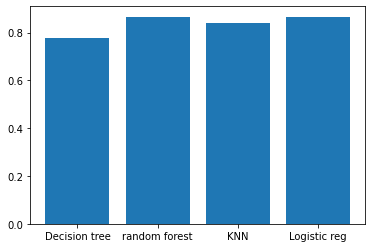

In [66]:
plt.bar(pie_chart, height=sizes)